In [1]:
#Use object oriented programming to create a superposition generator 
#Demonstrate the vanishing of exp(Z) as a function of shots
#This helps illustrate the greater precision of probability estimation with the greater number of shots

In [ ]:
import pennylane as qml 
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [4]:
class Sup:
    
    def __init__(self, qubits, shots):
        self.qubits = qubits
        self.shots = shots
        self.dev = qml.device("default.qubit", wires=self.qubits, shots = self.shots)
        
        #self.dev = qml.device('qiskit.ibmq', wires=self.qubits, backend='ibmq_qasm_simulator', ibmqx_token="f4781930f181f2ead1737ff5f9e94e66877279387509d59a75418e48d2fb402c3ad891140c0fd318e02514efe20197a9d8f3649cfdfca5156e1c40d2a0fb3701")
        
        self.qnode = qml.QNode(self.circuit, self.dev)
        
    def circuit(self, params = None):
            for i in range(self.qubits):
                qml.Hadamard(i)
            return [qml.expval(qml.PauliZ(i)) for i in range(self.qubits)]
        
    def run(self, params = None):
        return self.qnode(self.qubits)

In [5]:
S = Sup(3,10)

In [8]:
S.run()

[tensor(0., requires_grad=True),
 tensor(-0.2, requires_grad=True),
 tensor(0., requires_grad=True)]

In [9]:
exp = []
I = []
for i in range(10000):
    S = Sup(1,i+1)
    I.append(i) 
    exp.append(S.run())

KeyboardInterrupt: 

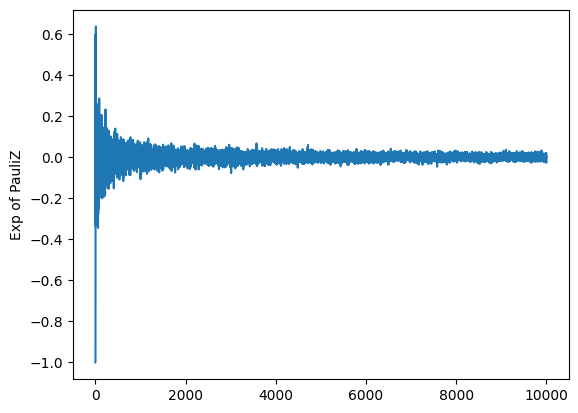

In [11]:
plt.plot(I,exp)
plt.ylabel('Exp of PauliZ')
plt.show()